# Определение перспективного тарифа для телеком-компании

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Для корректировки рекламного бюджета, необходимо понять, какой тариф приносит больше денег. Анализ будет проводиться по выборке из 500 клиентов «Мегалайна» за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Цель исследования** — определение более выгодного тарифа («Смарт» или «Ультра»)

**Ход исследования:**

Для анализа предоставлены следующие датасеты:
* `users.csv` содержит информацию о пользователях;
* `calls.csv` содержит информацию о звонках;
* `messages.csv` содержит информацию о сообщениях;
* `internet.csv` содержит информацию об интернет-сессиях;
* `tariffs.csv` содержит информацию о тарифах.

О качестве данных ничего не известно. Поэтому перед анализом понадобится обзор данных. Затем необходимо проверить данные на ошибки, оценить их влияние на исследование и исправить их. После этого добавить колонки с данными, необходимыми для дальнейшего анализа. После анализа данных следует проверка гипотез.

Таким образом, исследование пройдёт в шесть этапов:
 1. Обзор данных
 2. Предобработка данных
 3. Добавление данных
 4. Анализ данных
 5. Проверка гипотез
 6. Выводы

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Типы-данных" data-toc-modified-id="Типы-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Типы данных</a></span></li><li><span><a href="#Пропущенные-значения" data-toc-modified-id="Пропущенные-значения-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Пропущенные значения</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Округление-секунд-до-минут" data-toc-modified-id="Округление-секунд-до-минут-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Округление секунд до минут</a></span></li></ul></li><li><span><a href="#Добавление-расчетных-данных" data-toc-modified-id="Добавление-расчетных-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавление расчетных данных</a></span><ul class="toc-item"><li><span><a href="#Расчет-данных-по-месяцам" data-toc-modified-id="Расчет-данных-по-месяцам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Расчет данных по месяцам</a></span></li><li><span><a href="#Слияние-датасетов" data-toc-modified-id="Слияние-датасетов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Слияние датасетов</a></span></li><li><span><a href="#Расчет-выручки" data-toc-modified-id="Расчет-выручки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчет выручки</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Обзор данных

Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

pd.options.mode.chained_assignment = None

Считаем датасеты и сохраним в переменные:

In [2]:
try:
    df = pd.read_csv('/datasets/users.csv')
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
except:
    df = pd.read_csv('users.csv')
    calls = pd.read_csv('calls.csv')
    internet = pd.read_csv('internet.csv')
    messages = pd.read_csv('messages.csv')
    tariffs = pd.read_csv('tariffs.csv')

Выведем на экран первые, последние и случайные пять строк каждой таблицы, а также общую информацию. Создадим для этого собственную функцию и применим ее к словарю с названиями датасетов:

In [3]:
def total_view(df, n_rows=5, seed=None):
    '''Возвращает первые, случайные и последние строки таблицы (по умолчанию по 5 строк)'''
    return pd.concat([df.head(n_rows),
                      df.sample(n_rows,random_state=seed),
                      df.tail(n_rows)
                     ])

# словарь с названием датасетов
datasets_names = {'df': df, 'calls': calls, 'internet': internet, 'messages': messages}

# выведем на экран результат работы total_view(), info() и describe() по каждому датасету
for data in datasets_names:
    print(data)
    display(total_view(datasets_names[data]))
    datasets_names[data].info()
    display(datasets_names[data].describe())
    print('')

display('tariffs', tariffs)

df


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
147,1147,63,NaN,Якутск,Владимир,Синицын,2018-07-09,smart
70,1070,20,NaN,Химки,Эльза,Селиванова,2018-08-07,smart
207,1207,57,NaN,Балашиха,Яна,Зеленина,2018-08-12,smart
24,1024,73,NaN,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra
80,1080,28,NaN,Москва,Всеволод,Игнатьев,2018-08-12,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000



calls


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
188881,1465_598,2018-08-05,6.60,1465
56471,1143_535,2018-06-24,14.88,1143
14335,1037_107,2018-12-20,12.89,1037
167756,1412_673,2018-10-20,13.28,1412
92510,1230_97,2018-12-24,0.00,1230


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000



internet


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
98659,98659,1331_183,346.16,2018-06-19,1331
28342,28342,1099_6,56.74,2018-05-12,1099
143414,143414,1480_102,699.31,2018-03-25,1480
123365,123365,1414_458,625.57,2018-10-23,1414
37635,37635,1132_8,516.11,2018-11-12,1132


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000



messages


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
10207,1042_4,2018-12-06,1042
115755,1472_59,2018-10-19,1472
111459,1451_38,2018-12-01,1451
54031,1239_96,2018-10-14,1239
69771,1299_51,2018-04-10,1299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


'tariffs'

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В датасете `users.csv` 8 колонок и 500 строк. Тип данных в колонках `int64` и `object`.
Каждая строка соответствует уникальному пользователю.
Согласно документации к данным:
* `user_id` — уникальный идентификатор пользователя;
* `first_name` — имя пользователя;
* `last_name` — фамилия пользователя;
* `age` — возраст пользователя (годы);
* `reg_date` — дата подключения тарифа (день, месяц, год);
* `churn_date` — дата прекращения пользования тарифом;
* `city` — город проживания пользователя;
* `tarif` — название тарифного плана.

Пропущенные значения в `churn_date` означают, что на момент выгрузки данных тариф еще действовал.

В датасете `calls.csv` 4 колонки и 202607 строк. Тип данных в колонках `float64`, `int64` и `object`.
Согласно документации к данным:
* `id` — уникальный номер звонка;
* `call_date` — дата звонка;
* `duration` — длительность звонка в минутах;
* `user_id` — идентификатор пользователя, сделавшего звонок.

Пропущенные значения отсутствуют.

В датасете `internet.csv` 5 колонок и 149396 строк. Тип данных в колонках `float64`, `int64` и `object`.
Согласно документации к данным:
* `id` — уникальный номер сессии;
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах);
* `session_date` — дата интернет-сессии;
* `user_id` — идентификатор пользователя.

Пропущенные значения отсутствуют.

В датасете `messages.csv` 3 колонки и 123036 строк. Тип данных в колонках `int64` и `object`.
Согласно документации к данным:
* `id` — уникальный номер сообщения;
* `message_date` — дата сообщения;
* `user_id` — идентификатор пользователя, отправившего сообщение.

Пропущенные значения отсутствуют.

В датасете `tariffs.csv` 8 колонок и 2 строки. Тип данных в колонках `int64` и `object`.
Каждая строка соответствует уникальному тарифу.
Согласно документации к данным:
* `tariff_name` — название тарифа;
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях;
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату;
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату;
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета;
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

Пропущенные значения отсутствуют.

**Выводы**

В каждой строке датасета `users.csv` содержатся данные об уникальном пользователе, такие как идентификатор пользователя, имя, фамилия, возраст, даты подключения и прекращения пользования тарифом, город проживания и название тарифного плана.

В датасете `tariffs.csv` всего 2 строки с тарифными планами `smart` и `ultra`, каждая из которых содержит условия соответствующего тарифного плана.

В датасетах `calls.csv`, `internet.csv` и `messages.csv` содержатся данные об использованных услугах - звонках, интернет-сессиях и сообщениях. Каждой записи соответствует дата и идентификатор пользователя. Длительность звонков и объем трафика предоставлена в фактических значениях, которые надо будет округлить, так как по тарифу секунды округляются до минут по каждому звонку, а общая сумма трафика за месяц округляется до гигабайта в большую сторону.

Колонка `user_id` (идентификатор пользователя) общая для всех датасетов, кроме `tariffs.csv`.

Пропуски есть только в таблице `users.csv` в колонке `churn_date` и означают, что на момент выгрузки данных тариф еще действовал. Можно заполнить их строкой `'2019-01-01'` и оставить строковый тип данных, это понадобится после объединения датафреймов при проверке действовал ли договор в указаном месяце

Во всех датасетах, где есть колонки с датой, тип данных в соответствующих колонках `object`.

Максимальные и минимальные значения во всех датасетах выглядят правдоподобно. Выбивающихся значений нет.

Предварительно можно утверждать, что данных для проведения анализа достаточно. Прежде чем приступать к анализу, необходимо:
* привести данные к нужным типам;
* заполнить пропуски в `df['churn_date']`;
* проверить и удалить дубликаты;
* проверить данные на наличие неявных дубликатов;
* округлить до минут длительность каждого звонка и до гигабайта трафик за каждый месяц (округление гигабайтов на этапе расчета помесячных данных).

## Предобработка данных

### Типы данных
Заменим тип данных колонок с датой на `datetime` в датафреймах `calls`, `internet` и `messages`:

In [4]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

### Пропущенные значения

Так как в выборке данные за 2018 год, заполним пропуски в `df['churn_date']` строкой `'2019-01-01'` и оставим строковый тип данных, это понадобится после объединения датафреймов при проверке действовал ли договор в указаном месяце:

In [5]:
df['churn_date'] = df['churn_date'].fillna('2019-01-01')

### Дубликаты
Проверим наличие явных дубликатов:

In [6]:
print('df', df.duplicated().sum())
print('calls', calls.duplicated().sum())
print('internet', internet.duplicated().sum())
print('messages', messages.duplicated().sum())

df 0
calls 0
internet 0
messages 0


Проверим наличие неявных дубликатов в `df['tariff']`:

In [7]:
df['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

### Округление секунд до минут

Округлим время каждого звонка до минут в большую сторону:

In [8]:
calls['duration'] = np.ceil(calls['duration'])

## Добавление расчетных данных

### Расчет данных по месяцам
Добавим колонку с месяцем в датафреймы `calls`, `internet` и `messages`:

In [9]:
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам:

In [10]:
calls_month = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', np.size])
calls_month.columns = ['duration', 'calls_amount']
total_view(calls_month)

duration  calls_amount
user_id month                        
1000    5         159.0          22.0
        6         172.0          43.0
        7         340.0          47.0
        8         408.0          52.0
        9         466.0          58.0
1366    12        229.0          30.0
1395    6         541.0          72.0
1119    5         171.0          28.0
1263    5         677.0          93.0
1152    10        243.0          31.0
1498    10        247.0          41.0
1499    9          70.0           9.0
        10        449.0          68.0
        11        612.0          74.0
        12        492.0          69.0

Посчитаем для каждого пользователя количество отправленных сообщений по месяцам:

In [11]:
messages_month = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
messages_month.columns = ['messages']
total_view(messages_month)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
1015    5            73
1358    11           66
1484    12          109
1476    12           11
1189    4            22
1498    10           42
1499    9            11
        10           48
        11           59
        12           66

Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам и округлим мегабайты до гигабайтов в большую сторону:

In [12]:
internet_month = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_month.columns = ['gb_used']
internet_month['gb_used'] = np.ceil(internet_month['gb_used'] / 1024)
total_view(internet_month)

gb_used
user_id month         
1000    5          3.0
        6         23.0
        7         14.0
        8         14.0
        9         15.0
1426    12        21.0
1412    7         40.0
1104    2          2.0
1324    9         23.0
1298    12        26.0
1498    10        21.0
1499    9          2.0
        10        18.0
        11        18.0
        12        13.0

### Слияние датасетов

Для дальнейшего анализа необходимо объединить датафреймы `calls`, `internet` и `messages`. Создадим сводную таблицу с полным набором мультииндексов из колонок `user_id` и `month`, чтобы при объединении не произошло потери данных:

In [13]:
df_common = df[['user_id']]
df_common['col1'] = 1
months = pd.DataFrame({'col1' : [1 for i in range(1,13)], 'month' : [i for i in range(1,13)]})
df_common = df_common.merge(months, on=['col1']).drop('col1', axis='columns').set_index(['user_id', 'month'])
df_common

Empty DataFrame
Columns: []
Index: [(1000, 1), (1000, 2), (1000, 3), (1000, 4), (1000, 5), (1000, 6), (1000, 7), (1000, 8), (1000, 9), (1000, 10), (1000, 11), (1000, 12), (1001, 1), (1001, 2), (1001, 3), (1001, 4), (1001, 5), (1001, 6), (1001, 7), (1001, 8), (1001, 9), (1001, 10), (1001, 11), (1001, 12), (1002, 1), (1002, 2), (1002, 3), (1002, 4), (1002, 5), (1002, 6), (1002, 7), (1002, 8), (1002, 9), (1002, 10), (1002, 11), (1002, 12), (1003, 1), (1003, 2), (1003, 3), (1003, 4), (1003, 5), (1003, 6), (1003, 7), (1003, 8), (1003, 9), (1003, 10), (1003, 11), (1003, 12), (1004, 1), (1004, 2), (1004, 3), (1004, 4), (1004, 5), (1004, 6), (1004, 7), (1004, 8), (1004, 9), (1004, 10), (1004, 11), (1004, 12), (1005, 1), (1005, 2), (1005, 3), (1005, 4), (1005, 5), (1005, 6), (1005, 7), (1005, 8), (1005, 9), (1005, 10), (1005, 11), (1005, 12), (1006, 1), (1006, 2), (1006, 3), (1006, 4), (1006, 5), (1006, 6), (1006, 7), (1006, 8), (1006, 9), (1006, 10), (1006, 11), (1006, 12), (1007, 1), (1007, 2), (1007, 3), (1007, 4), (1007, 5), (1007, 6), (1007, 7), (1007, 8), (1007, 9), (1007, 10), (1007, 11), (1007, 12), (1008, 1), (1008, 2), (1008, 3), (1008, 4), ...]

[6000 rows x 0 columns]

Объединим датафреймы `calls`, `internet` и `messages` с полным набором мультииндексов, заполним образовавшиеся пропуски нулями:

In [14]:
df_common = df_common.join([calls_month, internet_month, messages_month]).fillna(0)
total_view(df_common)

duration  calls_amount  gb_used  messages
user_id month                                           
1000    1           0.0           0.0      0.0       0.0
        2           0.0           0.0      0.0       0.0
        3           0.0           0.0      0.0       0.0
        4           0.0           0.0      0.0       0.0
        5         159.0          22.0      3.0      22.0
1330    3         865.0         118.0     29.0      69.0
1047    5           0.0           0.0      0.0       0.0
1198    3           0.0           0.0      0.0       0.0
1056    9         338.0          50.0     21.0      39.0
1052    3           0.0           0.0      0.0       0.0
1499    8           0.0           0.0      0.0       0.0
        9          70.0           9.0      2.0      11.0
        10        449.0          68.0     18.0      48.0
        11        612.0          74.0     18.0      59.0
        12        492.0          69.0     13.0      66.0

Приведем индексы в `df_common` и `df` к общему виду:

In [15]:
df_common = df_common.reset_index().set_index('user_id')
df = df.set_index('user_id')

Объединим `df_common` и `df`, для дальнейшей работы из `df` нам понадобятся колонки `['reg_date', 'churn_date',  'city', 'tariff']`:

In [16]:
df_common = df_common.join(df[['reg_date', 'churn_date', 'city', 'tariff']], how='left')
total_view(df_common)

,month,duration,calls_amount,gb_used,messages,reg_date,churn_date,city,tariff
user_id,,,,,,,,,
1000,1,0.0,0.0,0.0,0.0,2018-05-25,2019-01-01,Краснодар,ultra
1000,2,0.0,0.0,0.0,0.0,2018-05-25,2019-01-01,Краснодар,ultra
1000,3,0.0,0.0,0.0,0.0,2018-05-25,2019-01-01,Краснодар,ultra
1000,4,0.0,0.0,0.0,0.0,2018-05-25,2019-01-01,Краснодар,ultra
1000,5,159.0,22.0,3.0,22.0,2018-05-25,2019-01-01,Краснодар,ultra
1058,2,0.0,0.0,0.0,0.0,2018-10-07,2019-01-01,Вологда,smart
1425,1,0.0,0.0,0.0,0.0,2018-02-27,2019-01-01,Пермь,smart
1378,12,563.0,90.0,14.0,7.0,2018-01-19,2019-01-01,Иркутск,smart
1116,7,286.0,48.0,15.0,0.0,2018-04-17,2019-01-01,Петрозаводск,smart


Теперь надо избавиться от месяцев, в которых не действовал договор, чтобы они не повлияли на дальнейшие расчеты. Для этого напишем  и применим собственную функцию:

In [17]:
def valid_month(row):
    '''Проверяет действовал ли договор в указанный месяц 2018 года. 
    Если действовал - возвращает True, если нет - False.
    '''
    if row['month'] <= 9:
        if ((row['reg_date'] <= '2018-0%s-31' % row['month']) 
            and ('2018-0%s-01' % row['month'] <= row['churn_date'])):
            return True 
        else:
            return False
    else:
        if ((row['reg_date'] <= '2018-%s-31' % row['month']) 
            and ('2018-%s-01' % row['month'] <= row['churn_date'])):
            return True
        else:
            return False

# применяем функцию valid_month()
df_common['is_valid_month'] = df_common.apply(valid_month, axis=1)

# оставляем только нужные строки
df_common = df_common.loc[df_common['is_valid_month'] != False]
total_view(df_common)      

,month,duration,calls_amount,gb_used,messages,reg_date,churn_date,city,tariff,is_valid_month
user_id,,,,,,,,,,
1000,5,159.0,22.0,3.0,22.0,2018-05-25,2019-01-01,Краснодар,ultra,True
1000,6,172.0,43.0,23.0,60.0,2018-05-25,2019-01-01,Краснодар,ultra,True
1000,7,340.0,47.0,14.0,75.0,2018-05-25,2019-01-01,Краснодар,ultra,True
1000,8,408.0,52.0,14.0,81.0,2018-05-25,2019-01-01,Краснодар,ultra,True
1000,9,466.0,58.0,15.0,57.0,2018-05-25,2019-01-01,Краснодар,ultra,True
1381,10,643.0,100.0,23.0,43.0,2018-01-13,2019-01-01,Москва,ultra,True
1456,8,152.0,23.0,7.0,0.0,2018-08-25,2019-01-01,Санкт-Петербург,smart,True
1218,12,378.0,57.0,12.0,16.0,2018-07-14,2019-01-01,Екатеринбург,smart,True
1409,8,846.0,117.0,21.0,39.0,2018-03-14,2019-01-01,Набережные Челны,smart,True


### Расчет выручки

Добавим помесячную выручку с каждого пользователя. Для этого напишем функцию, которая будет производить расчет с учетом тарифного плана и применим ее к датасету:

In [18]:
tariffs = tariffs.set_index('tariff_name')

In [19]:
def revenue(row):
    '''Возвращает месячную выручку с пользователя'''
        
    add_gb = (row['gb_used'] - int(tariffs.loc[row['tariff'], 'mb_per_month_included'] / 1024)) \
             * tariffs.loc[row['tariff'], 'rub_per_gb']
    if add_gb < 0:
        add_gb = 0
    add_mins = (row['duration'] - tariffs.loc[row['tariff'], 'minutes_included']) \
               * tariffs.loc[row['tariff'], 'rub_per_minute']
    if add_mins < 0:
        add_mins = 0
    add_message = (row['messages'] - tariffs.loc[row['tariff'], 'messages_included']) \
                  * tariffs.loc[row['tariff'], 'rub_per_message']
    if add_message < 0:
        add_message = 0
        
    month_revenue = add_gb + add_mins + add_message + tariffs.loc[row['tariff'], 'rub_monthly_fee']
        
    return month_revenue
    
# применим функцию revenue() к датасету
df_common['revenue'] = df_common.apply(revenue, axis=1)
total_view(df_common)

,month,duration,calls_amount,gb_used,messages,reg_date,churn_date,city,tariff,is_valid_month,revenue
user_id,,,,,,,,,,,
1000,5,159.0,22.0,3.0,22.0,2018-05-25,2019-01-01,Краснодар,ultra,True,1950.0
1000,6,172.0,43.0,23.0,60.0,2018-05-25,2019-01-01,Краснодар,ultra,True,1950.0
1000,7,340.0,47.0,14.0,75.0,2018-05-25,2019-01-01,Краснодар,ultra,True,1950.0
1000,8,408.0,52.0,14.0,81.0,2018-05-25,2019-01-01,Краснодар,ultra,True,1950.0
1000,9,466.0,58.0,15.0,57.0,2018-05-25,2019-01-01,Краснодар,ultra,True,1950.0
1233,6,496.0,85.0,26.0,22.0,2018-05-23,2019-01-01,Воронеж,smart,True,2750.0
1439,12,409.0,54.0,21.0,11.0,2018-06-30,2019-01-01,Орёл,smart,True,1750.0
1171,7,679.0,89.0,12.0,68.0,2018-03-20,2019-01-01,Москва,smart,True,1141.0
1064,12,337.0,46.0,20.0,26.0,2018-03-17,2018-12-26,Якутск,smart,True,1550.0


**Выводы**

- Тип данных в колонках с датами изменен на `datetime`. 
- Пропуски в `df['churn_date']` заполнены строкой `'2019-01-01'`
- Явных и неявных дубликатов не обнаружено. 
- Время звонков в `calls['duration']` округлено до минут в большую сторону.
- Месячный трафик в `internet['gb_used']` округлен до гигабайт в большую сторону.
- Добавлены колонки с месяцем в датафреймы `calls`, `internet` и `messages`.
- Необходимые данные из датафреймов `df`, `calls`, `internet` и `messages` объединены в один датафрейм.
- В итоговую таблицу добавлена помесячная выручка с учетом условий тарифов.


## Анализ данных

Посчитаем среднее и медианное количество, дисперсию и стандартное отклонение сообщений, минут разговора, интернет-трафика в месяц по каждому тарифу:

In [20]:
df_common.pivot_table(index='tariff',
                      values=['duration', 'gb_used', 'messages'],
                      aggfunc=['median', 'mean', np.var, np.std]
                     ).round(2)

median                      mean                         var          \
       duration gb_used messages duration gb_used messages   duration gb_used   
tariff                                                                          
smart     421.5    17.0     28.0   417.75   16.32    33.37   36281.39   33.13   
ultra     518.0    19.0     38.0   526.09   19.47    49.31  101052.49   97.38   

                     std                   
       messages duration gb_used messages  
tariff                                     
smart    796.96   190.48    5.76    28.23  
ultra   2285.42   317.89    9.87    47.81

Построим гистограмму плотности вероятностей для минут, гигабайтов и сообщений по каждому тарифу:

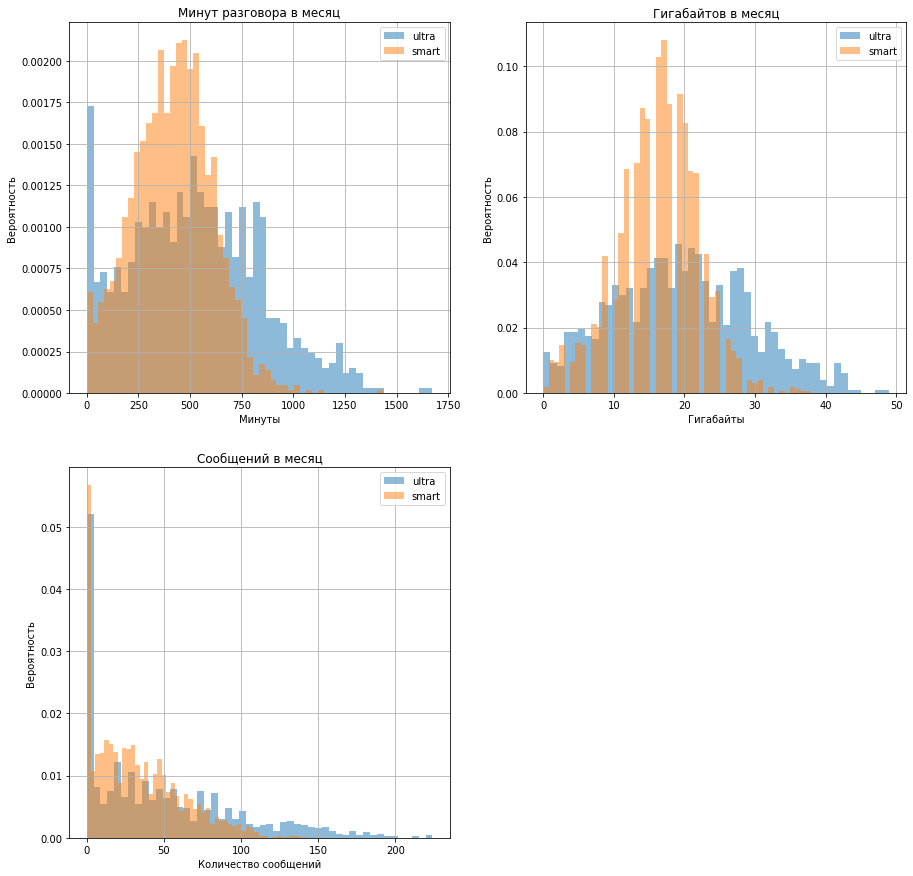

In [21]:
services_list =['duration', 'gb_used', 'messages']
cnt = 1
plt.figure(figsize=(15, 15))
for service in services_list:
    plt.subplot(2, 2, cnt)
    plt.ylabel('Вероятность')
    df_common.loc[df_common['tariff'] == 'ultra', service].hist(density=True, bins=50, alpha=0.5)
    df_common.loc[df_common['tariff'] == 'smart', service].hist(density=True, bins=50, alpha=0.5)
    if cnt == 1:
        plt.legend(['ultra', 'smart'])
        plt.title('Минут разговора в месяц')
        plt.xlabel('Минуты')
    if cnt == 2:
        plt.legend(['ultra', 'smart'])
        plt.title('Гигабайтов в месяц')
        plt.xlabel('Гигабайты')
    if cnt == 3:
        plt.legend(['ultra', 'smart'])
        plt.title('Сообщений в месяц')
        plt.xlabel('Количество сообщений')
    cnt +=1

**Выводы**
- Средние и медианные значения не сильно различаются между собой, за исключением среднего и медианного количества сообщений пользователей тарифа «Ультра». Пользователи тарифа «Смарт» в среднем используют 421.5 минут разговора, 17 ГБ и 28 сообщений. Пользователи тарифа 'ultra' в среднем пользуются услугами больше: 518 минут разговора, 19 ГБ и 38 сообщений (49 медианное количество). 
- Дисперсия и стандартное отклонение у пользователей тарифа «Смарт» меньше, чем у пользователей тарифа «Ультра». 
- Стандартное отклонение у пользователей тарифа «Смарт» в среднем на 40% меньше, чем у пользователей тарифа «Ультра»:
    * минут разговоров за месяц у пользователей тарифа «Смарт» 190 минут, у пользователей тарифа «Ультра» 318 минут;
    * использованных гигабайтов у пользователей тарифа «Смарт» 5.8 ГБ, у пользователей тарифа «Ультра» 9.9 ГБ;
    * отправленных сообщений у пользователей тарифа «Смарт» 28, у пользователей тарифа «Ультра» 48.
    
- По гистрограммам наглядно отражается разница в дисперсии и стандартном отклонении между тарифами. У «Ультры» распределения заметно скошены вправо, на графиках минут и сообщений видны пики на нулевой отметке, это значит, что примерно каждые 5 пользователей из 100 не отправляют сообщения и 1-2 из 100 не звонят. Разброс на графиках очень большой, что подтверждает большая дисперсия, рассчитанная ранее.
- У «Смарта» распределение больше похоже на нормальное, скошенность вправо на графиках минут и гигабайт заметно меньше, чем у «Ультры». Примерно каждые 6 пользователей «Смарта» не отправляют сообщения. 
- Большая часть пользователей «Смарта» укладывается в предусмотренные тарифом пакеты минут и сообщений, ГБ большинству не хватает. Пользователи «Ультры» полностью укладываются в в предусмотренные тарифом пакеты минут и сообщений, ГБ большинству хватает.
- В целом можно сделать вывод, что пользователи «Ультры» меньше следят за пакетами услуг, так как их размера большинству хватает в полной мере. Пользователи «Смарта» же стремятся не превышать размер ежемесячных пакетов услуг.

## Проверка гипотез

Чтобы проверить гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, сформулируем нулевую и альтернативную гипотезы. Нулевая гипотеза всегда подразумевает равенство, а альтернативная наоборот. Следовательно, нулевая гипотеза будет звучать так:

*Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.*

Тогда альтернативной гипотезой будет:

*Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.*

Проверим эту гипотезу с помощью t-теста, используя `scipy.stats.ttest_ind (array1, array2, equal_var)` c параметром `equal_var = False`, так как дисперсия среднемесячной выручки между тарифами должна различаться, потому что пользователи тарифов по-разному используют предоставленные пакеты услуг (пользователи «Ультры» чаще укладываются в предоплаченные пакеты, чем пользователи «Смарта», соответственно они чаще оплачивают только абонентскую плату).
Для начала сравним размеры выборок:

In [22]:
print('Ультра', len(df_common.loc[df_common['tariff'] == 'ultra', 'revenue']))
print('Смарт', len(df_common.loc[df_common['tariff'] == 'smart', 'revenue']))

Ультра 986
Смарт 2230


Сделаем выборку по тарифу «Смарт» равной по размеру выборке тарифа «Ультра» и используем t-тест для проверки гипотезы, установим пороговое значение alpha = 0.01:

In [23]:
smart_revenue = df_common.loc[df_common['tariff'] == 'smart', 'revenue'].sample(986, random_state=1)
ultra_revenue = df_common.loc[df_common['tariff'] == 'ultra', 'revenue']

alpha = .01 

results = st.ttest_ind(smart_revenue, ultra_revenue, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  7.013282316717449e-143
Отвергаем нулевую гипотезу


Вероятность получить выборки с такими средними меньше порогового значения и составляет примерно 7.013 / 10 ** 143. Следовательно мы отвергаем нулевую гипотезу. Сравним среднюю и медианную выручку по пользователю в месяц по тарифам:

In [24]:
print('"Smart" median:', smart_revenue.median())
print('"Ultra" median:', ultra_revenue.median())
print('"Smart" mean:', smart_revenue.mean())
print('"Ultra" mean:', ultra_revenue.mean())

"Smart" median: 986.0
"Ultra" median: 1950.0
"Smart" mean: 1259.5456389452333
"Ultra" mean: 2070.030425963489


Средняя и медианная выручка с пользователя тарифа «Ультра» почти в 2 раза больше, чем с пользователя тарифа «Смарт». Можно сделать вывод, что с вероятностью более 99% тариф «Ультра» приносит больше выручки с пользователя, чем тариф «Смарт».

Проверим вторую гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Для этого сформулируем нулевую гипотезу :

*Средняя выручка пользователей из Москвы и из других регионов равны.*

Тогда альтернативная гипотеза будет звучать так:

*Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.*

Проверим эту гипотезу с помощью t-теста, используя `scipy.stats.ttest_ind (array1, array2, equal_var)` c параметром `equal_var = True`, так как можно предположить, что дисперсия среднемесячной выручки между Москвой и другими регионами (из которых в выборку вошли достаточно крупные города с близким к Москве уровнем жизни) сильно не отличается. Для начала сравним размеры выборок:

In [25]:
print('Москва', len(df_common.loc[df_common['city'] == 'Москва', 'revenue']))
print('Другие регионы', len(df_common.loc[df_common['city'] != 'Москва', 'revenue']))

Москва 611
Другие регионы 2605


Сделаем выборку по регионам равной размеру выборки по Москве, и используем t-тест для проверки гипотезы, установим пороговое значение alpha = 0.01:

In [26]:
moscow_revenue = df_common.loc[df_common['city'] == 'Москва', 'revenue']
region_revenue = df_common.loc[df_common['city'] != 'Москва', 'revenue'].sample(611, random_state=12)

alpha = .01 

results = st.ttest_ind(moscow_revenue, region_revenue)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5310935158190808
Не получилось отвергнуть нулевую гипотезу


Вероятность получить выборки с такими средними составляет примерно 53%, это достаточно высокая вероятность, отвергать нулевую гипотезу нельзя. Сравним среднюю и медианную выручку по пользователю в месяц по Москве и регионам:

In [27]:
print('Москва median:', moscow_revenue.median())
print('Регионы median:', region_revenue.median())
print('Москва mean:', moscow_revenue.mean())
print('Регионы mean:', region_revenue.mean())

Москва median: 1750.0
Регионы median: 1550.0
Москва mean: 1546.7135842880523
Регионы mean: 1518.7119476268413


Средние значения между выборками практически не отличаются, медианная выручка по Москве примерно на 12% выше, чем в регионах. В целом можно сделать вывод, что выручка между Московй и регионами существенно не отличается.

## Выводы

- Средняя и медианная выручка с пользователя тарифа «Ультра» (2070 и 1950 руб. соответственно) почти в 2 раза больше, чем с пользователя тарифа «Смарт» (1259 и 986 руб. соответственно). Можно сделать вывод, что с вероятностью более 99% тариф «Ультра» приносит больше выручки с пользователя, чем тариф «Смарт».
- Средние значения между выборками практически не отличаются (1546 руб. по Москве, 1518 руб. по регионам), медианная выручка по Москве примерно на 12% выше, чем в регионах (1750 и 1550 руб. соответственно). В целом можно сделать вывод, что выручка между Московй и регионами существенно не отличается.
- Исходя из полученных результатов, можно сделать вывод, что тариф «Ультра» для компании «Мегалайн» выгоднее , чем тариф «Смарт» (при условии, что себестоимость услуг по пакетам не различается или различается в меньшей степени, чем выручка).